## News Text Classification
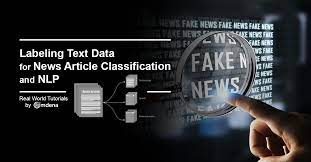


News text classification is a specific type of text classification that involves categorizing news articles into predefined categories, such as politics, sports, business, entertainment, and so on. The goal of news text classification is to automatically assign a news article to the appropriate category based on its content, using machine learning techniques. This task has many practical applications, such as organizing news articles on a website, recommending relevant news stories to users, and analyzing trends in the news media. News text classification often involves dealing with large volumes of text data and requires sophisticated natural language processing and machine learning techniques to achieve high accuracy.

## I. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

## II. load dataset

In [2]:
# read dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\Project Deep Learning\Project Deep Learning\news.csv")

In [3]:
df.head() ## head fuction used showing starting five raw

,Headline,Label,Unnamed: 2,Unnamed: 3
0,Four ways Bob Corker skewered Donald Trump,1,NaN,NaN
1,Linklater's war veteran comedy speaks to moder...,1,NaN,NaN
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,NaN,NaN
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,NaN,NaN
4,Jason Aldean opens 'SNL' with Vegas tribute,1,NaN,NaN


## III. Data preprocessing

What is data preprocessing? Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It has traditionally been an important preliminary step for the data mining process.

In [4]:
# check the columns headers
df.columns

Index(['Headline', 'Label', 'Unnamed: 2', 'Unnamed: 3'], dtype='object')

In [5]:
# delete unvated columns
df.drop(['Unnamed: 2', 'Unnamed: 3'],axis=1 ,inplace=True)

In [6]:
# check the data size
df.shape

(4048, 2)

In [7]:
df.head(2)

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1


In [8]:
# checking the duplicate values
df.duplicated().sum()

1198

In [9]:
# remove the duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
# check the null values
df.isna().sum()

Headline     1
Label       17
dtype: int64

In [11]:
# delete the null values
df = df.dropna()
df.head()

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [12]:
df.shape

(2833, 2)

In [13]:
## cheking the label columns values counts
df["Label"].value_counts()

1                                                                                                                                                                                                                                                                                              1604
0                                                                                                                                                                                                                                                                                              1225
 Derwent Innovations Index                                                                                                                                                                                                                                                                        1
 as indexed in the Clarivate Analytics Web of Science Core Collection database. The list was cross-referenced against the nu

In [14]:
## fint the index
df.loc[(df["Label"]!="0") & (df["Label"]!="1")].index

Int64Index([438, 439, 441, 475], dtype='int64')

In [15]:
## delete unwanted raw index
df = df.drop([438, 439, 441, 475],axis=0)

In [16]:
# This module provides regular expression matching operations similar to those found in Perl.
import re

In [17]:
# converting str
df["Headline"] = df["Headline"].astype(str)

In [18]:
df.head()

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [19]:
df.shape

(2829, 2)

In [20]:
## for loop used by text preprossing
pre = []
for i in df["Headline"]:
    a = i.lower()
    a = re.sub("[^a-z ]","",a)
    a = a.strip(" ")
    pre.append(a)

In [21]:
pre[0:5]

['four ways bob corker skewered donald trump',
 'linklaters war veteran comedy speaks to modern america says star',
 'trumps fight with corker jeopardizes his legislative agenda',
 'egypts cheiron wins tieup with pemex for mexican onshore oil field',
 'jason aldean opens snl with vegas tribute']

In [22]:
# add new column after preprosing 
df["preprocessed"] = pre

In [23]:
df.head()

,Headline,Label,preprocessed
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklaters war veteran comedy speaks to modern...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trumps fight with corker jeopardizes his legis...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypts cheiron wins tieup with pemex for mexic...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute


In [24]:
df.shape

(2829, 3)

In [25]:
# save csv file 
#df.to_csv("News.csv")

In [26]:
# read_csv
df = pd.read_csv(r"C:\Users\Dell\practice_python_evrhive\deep_learning\News.csv")
df.head()

,Unnamed: 0,Headline,Label,preprocessed
0,0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,1,Linklater's war veteran comedy speaks to moder...,1,linklaters war veteran comedy speaks to modern...
2,2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trumps fight with corker jeopardizes his legis...
3,3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypts cheiron wins tieup with pemex for mexic...
4,4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute


## IV. Tfidf Vectorizer
1.  proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present

In [27]:
# import TfidfVectorizer from sklern libries
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(df["preprocessed"]).toarray()

In [28]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
y = df["Label"]

In [30]:
## again check values count y lables
y.value_counts()

1    1604
0    1225
Name: Label, dtype: int64

In [31]:
y = df["Label"]

## V. Train Test Split

1. The train_test_split function of the sklearn. model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.

In [32]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=43)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2263, 7290)
(566, 7290)
(2263,)
(566,)



## VI. Build Neural networks model



1. Neural networks are a type of machine learning algorithm inspired by the structure and function of the human brain. They consist of layers of interconnected nodes that process and transform input data to generate output predictions. The network learns through a process of adjusting the weights of the connections between nodes based on feedback from the training data.

In [33]:
# importing nessaries libries
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [34]:
# model building
nn = Sequential()

In [35]:
## building nassiries layer for Neural networks
nn.add(Dense(256,input_dim=xtrain.shape[1],activation="relu"))
nn.add(Dropout(0.4))
nn.add(Dense(128,activation="relu"))
nn.add(Dropout(0.4))
nn.add(Dense(1,activation="sigmoid"))

In [36]:
## checkinf the model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1866496   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,899,521
Trainable params: 1,899,521
Non-trainable params: 0
_________________________________________________________________


In [37]:
#Stop training when performance metric stops improving
early_stop = EarlyStopping(monitor="val_loss",patience=10)

In [38]:
#Prepare a model for training by specifying loss function, optimizer, and evaluation metrics.
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
## fit train dataset
hist = nn.fit(xtrain,ytrain,batch_size=8,validation_split=0.2,epochs=100,callbacks=
             [early_stop])

Epoch 1/100
227/227 [==============================] - 3s 9ms/step - loss: 0.6503 - accuracy: 0.6055 - val_loss: 0.5192 - val_accuracy: 0.7616
Epoch 2/100
227/227 [==============================] - 2s 8ms/step - loss: 0.2844 - accuracy: 0.8917 - val_loss: 0.5285 - val_accuracy: 0.7682
Epoch 3/100
227/227 [==============================] - 2s 8ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.6321 - val_accuracy: 0.7550
Epoch 4/100
227/227 [==============================] - 2s 8ms/step - loss: 0.0091 - accuracy: 0.9989 - val_loss: 0.7799 - val_accuracy: 0.7660
Epoch 5/100
227/227 [==============================] - 2s 9ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.8033 - val_accuracy: 0.7638
Epoch 6/100
227/227 [==============================] - 2s 10ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.9466 - val_accuracy: 0.7351
Epoch 7/100
227/227 [==============================] - 2s 9ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.9714 - val_accuracy: 0.739

##  VII. visualization lerning curve

1. 
A learning curve is a graph that shows how the performance of a machine learning model improves or plateaus over time as it is trained on more data. It helps to identify underfitting or overfitting and determine the optimal amount of data to train on.

Text(0, 0.5, 'loss')

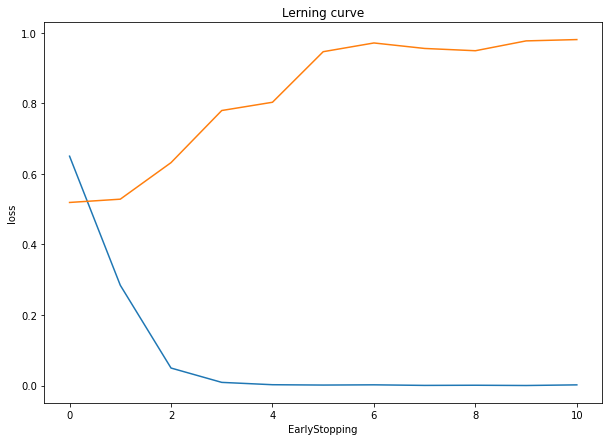

In [40]:
plt.figure(figsize=(10,7))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Lerning curve")
plt.xlabel("EarlyStopping")
plt.ylabel("loss")

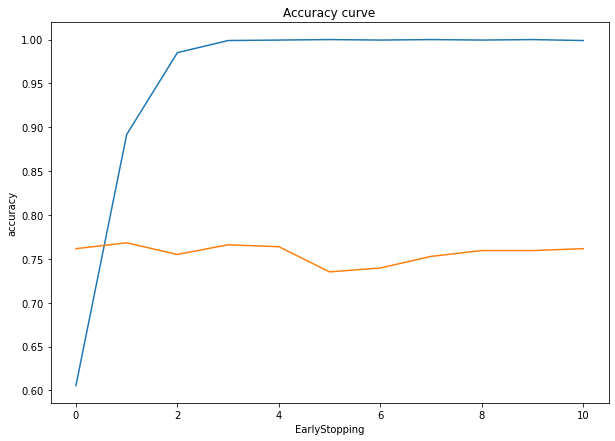

In [41]:
plt.figure(figsize=(10,7))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy curve")
plt.xlabel("EarlyStopping")
plt.ylabel("accuracy")
plt.show()

## VIII.  model evalulate
1. In neural networks, evaluation refers to the process of measuring the performance of a trained model on a set of data that it hasn't seen before, using various evaluation metrics such as accuracy, precision, recall, and F1 score. The evaluation helps to determine how well the model generalizes to new data and whether it is overfitting or underfitting the training data. The evaluation is typically done on a separate validation set or a test set that is held out from the training data

In [42]:
nn.evaluate(xtrain,ytrain)

71/71 [==============================] - 0s 3ms/step - loss: 0.1964 - accuracy: 0.9523


[0.19642652571201324, 0.9522757530212402]

In [43]:
nn.evaluate(xtest,ytest)

18/18 [==============================] - 0s 3ms/step - loss: 1.0670 - accuracy: 0.7527


[1.067047357559204, 0.7526502013206482]

## IX. Prediction

1. In machine learning, prediction refers to using a trained model to generate an output or label for a new input data point. The model takes in the input data and applies the learned patterns and relationships to make a prediction about the corresponding output variable. The predicted output can be a classification label, a numerical value, or a probability distribution over possible outcomes. Prediction is the primary goal of supervised learning algorithms, which aim to learn a mapping between input features and output labels from a labeled training dataset.








In [44]:
train = nn.predict(xtrain)
test = nn.predict(xtest)

18/18 [==============================] - 0s 4ms/step


In [45]:
## check train data top five prediction values
train[:5]

array([[9.9999249e-01],
       [2.2494562e-06],
       [8.9879417e-05],
       [3.3777169e-04],
       [4.4493713e-06]], dtype=float32)

In [46]:
## check test data top five prediction values
test[:5]

array([[2.8137956e-04],
       [9.9996632e-01],
       [9.9765277e-01],
       [9.9985117e-01],
       [5.9421140e-01]], dtype=float32)

In [47]:
## convert to thereshold 0 to 1 range trainset
train_class = []

for i in train:
    if i >= 0.5:
        train_class.append(1)
    else:
        train_class.append(0)

In [48]:
## convert to thereshold 0 to 1 range testset
test_class = []

for i in test:
    if i >= 0.5:
        test_class.append(1)
    else:
        test_class.append(0)

In [49]:
train_class[:5]

[1, 0, 0, 0, 0]

In [50]:
test_class[:5]

[0, 1, 1, 1, 1]

## X. Evaluate test data with sklearn metrics

1. In machine learning, evaluation refers to the process of measuring the performance of a trained model on a set of data that it hasn't seen before, called a test set. The evaluation metrics are used to assess how well the model generalizes to new data and to compare the performance of different models. Common evaluation metrics include accuracy, precision, recall, F1 score, and mean squared error.

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

cm = confusion_matrix(ytest,test_class)
cl = classification_report(ytest,test_class)
print(cm)
print(cl)

[[169  64]
 [ 76 257]]
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       233
           1       0.80      0.77      0.79       333

    accuracy                           0.75       566
   macro avg       0.75      0.75      0.75       566
weighted avg       0.75      0.75      0.75       566



<AxesSubplot:>

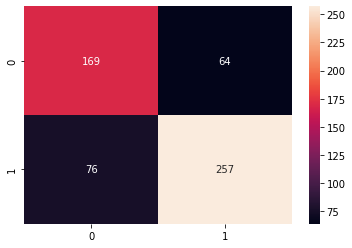

In [52]:
# visualtion confusion_matrix used heatmap 
sns.heatmap(cm,annot=True,fmt="d")